In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

!git clone https://github.com/eualezandre/Field-Project---Pairs-Trading.git

!ls

Cloning into 'Field-Project---Pairs-Trading'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
Field-Project---Pairs-Trading  sample_data


In [4]:
bloomberg=pd.ExcelFile(r'/content/Field-Project---Pairs-Trading/ORAMA.xlsx')

In [5]:
itau_min = pd.read_excel(bloomberg, 'ITUB4 BZ Equity Min')
itsa_min = pd.read_excel(bloomberg, 'ITSA4 BZ Equity Min')
itau_dia = pd.read_excel(bloomberg, 'ITUB4 BZ Equity Dia')
itsa_dia = pd.read_excel(bloomberg, 'ITSA4 BZ Equity Dia')

In [6]:
comp_min = pd.merge(left=itau_min, right=itsa_min, how='left', left_on='Data', right_on='Data') 
comp_dia = pd.merge(left=itau_dia, right=itsa_dia, how='left', left_on='Data', right_on='Data')

In [7]:
comp_dia.set_index('Data', inplace=True)

# Preços

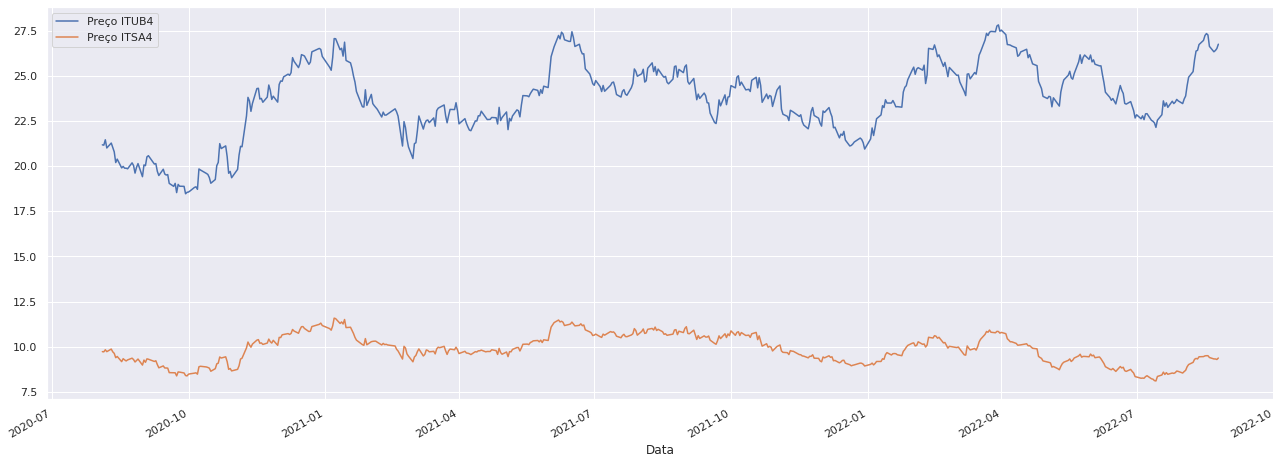

In [8]:
sb.set()
comp_dia.plot(figsize=(22,8))

# Retornos

In [9]:
comp_dia['Retorno ITUB4']=comp_dia['Preço ITUB4'].pct_change()
comp_dia['Retorno ITSA4']=comp_dia['Preço ITSA4'].pct_change()

In [10]:
corr = comp_dia['Retorno ITUB4'].rolling(252).corr(comp_dia['Retorno ITSA4'])

In [11]:
media_movel21=corr.rolling(21).mean()

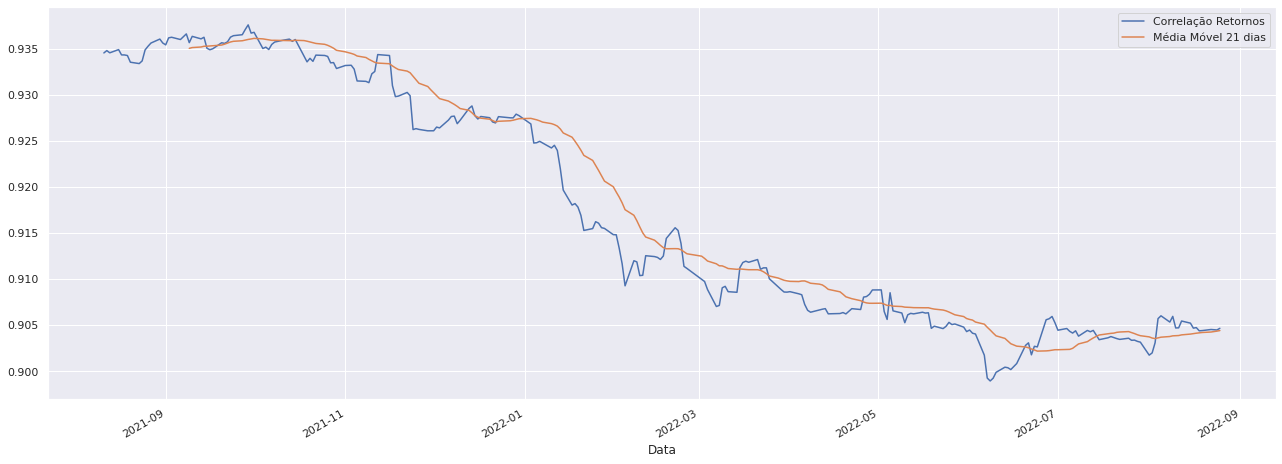

In [12]:
corr.plot(label='Correlação Retornos')
media_movel21.plot(label='Média Móvel 21 dias', figsize=(22,8)).legend()

# Padronizando os preços

In [13]:
comp_dia['ITSA4 Padronizado']=(1+comp_dia['Retorno ITSA4']).cumprod()
comp_dia['ITUB4 Padronizado']=(1+comp_dia['Retorno ITUB4']).cumprod()


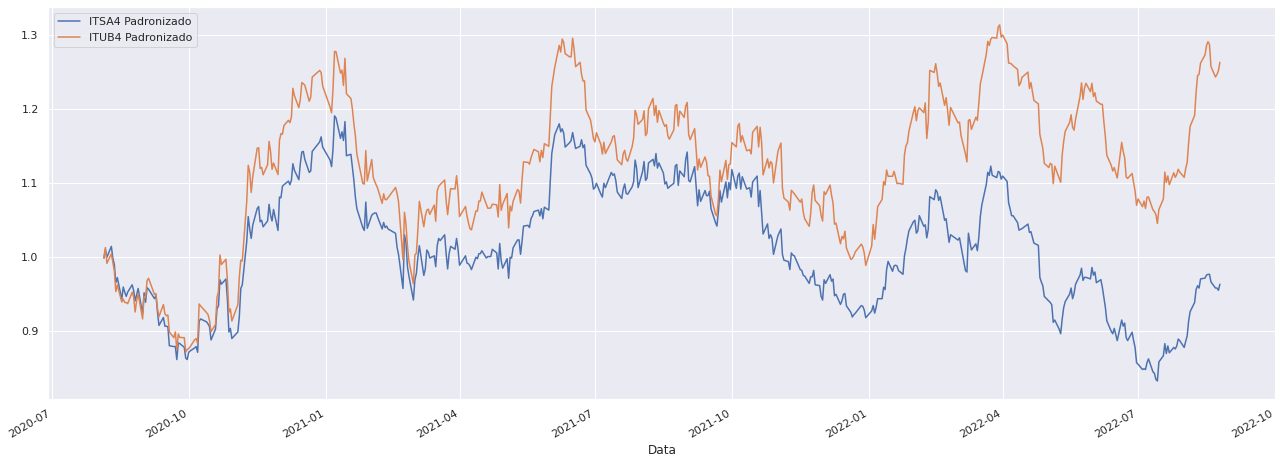

In [14]:
comp_dia['ITSA4 Padronizado'].plot(label='ITSA4 Padronizado')
comp_dia['ITUB4 Padronizado'].plot(label='ITUB4 Padronizado', figsize=(22,8)).legend()

# Normalizando os preços

In [15]:
comp_dia['ITSA4 Normalizado']=(comp_dia['ITSA4 Padronizado']-comp_dia['ITSA4 Padronizado'].mean())/comp_dia['ITSA4 Padronizado'].std()
comp_dia['ITUB4 Normalizado']=(comp_dia['ITUB4 Padronizado']-comp_dia['ITUB4 Padronizado'].mean())/comp_dia['ITUB4 Padronizado'].std()

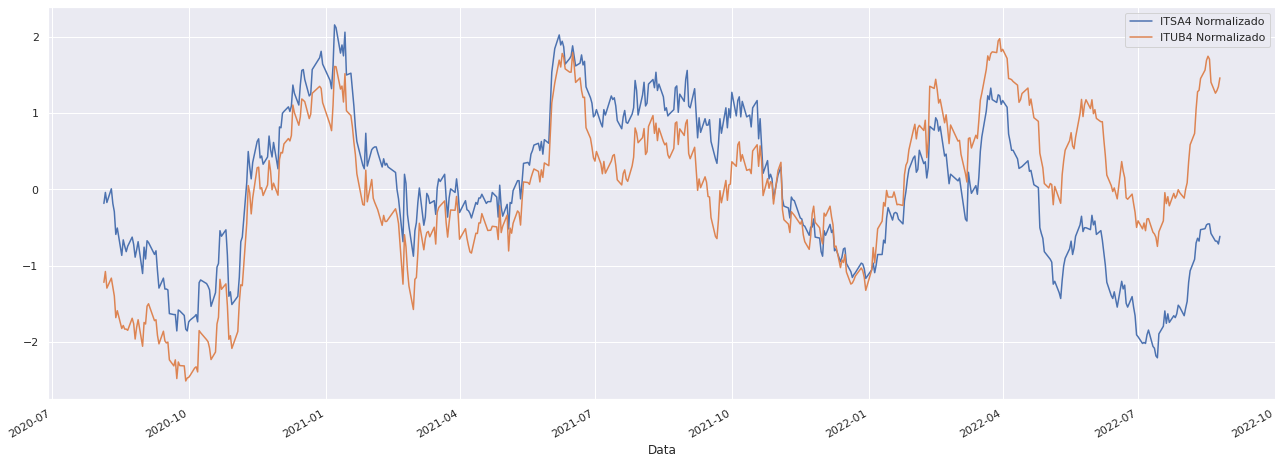

In [16]:
comp_dia['ITSA4 Normalizado'].plot(label='ITSA4 Normalizado')
comp_dia['ITUB4 Normalizado'].plot(label='ITUB4 Normalizado', figsize=(22,8)).legend()

# Operações

In [17]:
comp_dia['Diferença da normalização']=abs(comp_dia['ITUB4 Normalizado']-comp_dia['ITSA4 Normalizado'])

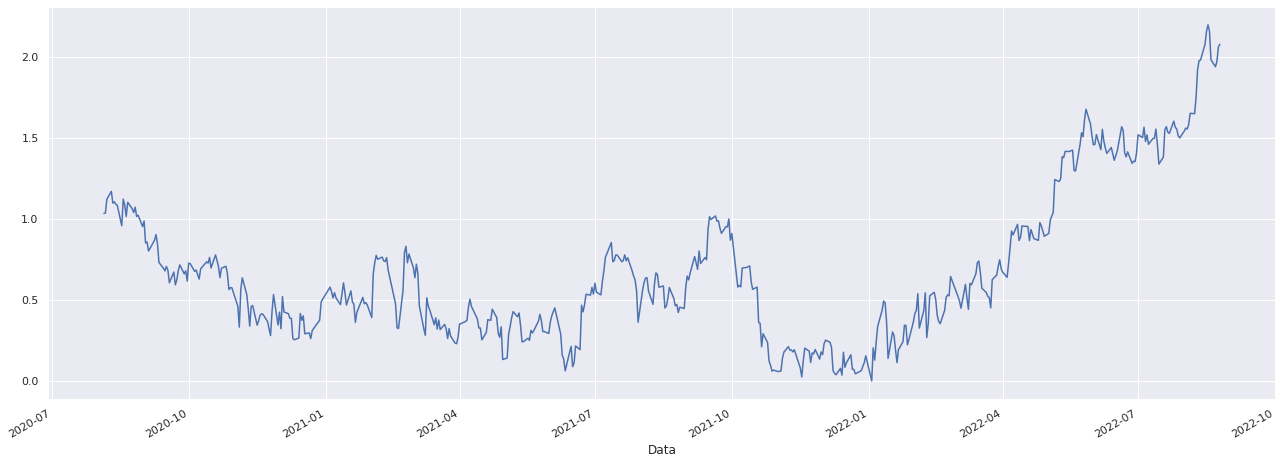

In [18]:
comp_dia['Diferença da normalização'].plot(label='Diferença da normalização', figsize=(22,8))

In [19]:
def position(d):
  for i in range(len(comp.dia)):
    if comp_dia['ITSA4 Normalizado'][i]-comp_dia['ITUB4 Normalizado'][i]>=0.5:


In [20]:
operacao
for i in range(len(comp.dia)):
  if comp_dia['ITSA4 Normalizado'][i]-comp_dia['ITUB4 Normalizado'][i]~>=0.5:
    open(i)

SyntaxError: ignored